In [1]:
import warnings 
warnings.filterwarnings('ignore')
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 15
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
from plotnine import *
import missingno as msno

공공 데이터 상권 분석하기 => https://www.data.go.kr/dataset/15012005/fileData.do

In [2]:
# read_csv() 함수 encoding 속성의 기본값은 'utf-8'인데, 제대로 읽어오지 못한다면 encoding 속성 값을 'euc-kr'/'cp949'/'ms949' 로 바꾼다.
shop_201806 = pd.read_csv('./data/shop_201806_01.csv',encoding='euc-kr')
#shop.head()

In [3]:
shop_201806.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [4]:
view_columns=['상호명','지점명','상권업종대분류명','상권업종중분류명','상권업종소분류명','시도명','시군구명','행정동명',
             '법정동명','지번주소','도로명주소','경도','위도']
shop_2018_06 = shop_201806[view_columns]
shop_2018_06

상호명         지점명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명 시군구명  \
0              와라와라호프         NaN       음식      유흥주점        호프/맥주  서울특별시  강남구   
1       커피빈코리아선릉로93길점  코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구   
2                프로포즈         NaN       음식      유흥주점        호프/맥주  서울특별시  금천구   
3            싱싱커피&토스트         NaN       음식     패스트푸드        토스트전문  부산광역시  사상구   
4            가락사우나내스낵         NaN    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   
...               ...         ...      ...       ...          ...    ...  ...   
499323       배스킨라빈스31     건대스타시티점       음식     패스트푸드      아이스크림판매  서울특별시  광진구   
499324           본도시락        본설렁탕       음식        한식         설렁탕집  서울특별시  강동구   
499325         체크페이먼트         NaN       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구   
499326          마젠타네일         NaN    생활서비스   이/미용/건강       발/네일케어  서울특별시  마포구   
499327           GS25       역촌대로점       소매     종합소매점          편의점  서울특별시  은평구   

        행정동명 법정동명                  지번주소                 도로명주소          경도  \
0       대치1동  대치동     서울특별시 강남구 대치동 604  서울특별시 강남구 남부순환로 2933  127.061026   
1       역삼1동  역삼동  서울특별시 강남구 역삼동 696-42    서울특별시 강남구 선릉로93길 6  127.047883   
2       독산3동  독산동   서울특별시 금천구 독산동 162-1    서울특별시 금천구 가산로 34-6  126.899220   
3        괘법동  괘법동     부산광역시 사상구 괘법동 578      부산광역시 사상구 괘감로 37  128.980455   
4        석촌동  석촌동     서울특별시 송파구 석촌동 256      서울특별시 송파구 가락로 71  127.104071   
...      ...  ...                   ...                   ...         ...   
499323  자양3동  자양동   서울특별시 광진구 자양동 227-7    서울특별시 광진구 아차산로 262  127.072944   
499324   강일동  상일동     서울특별시 강동구 상일동 502    서울특별시 강동구 상일로6길 39  127.175331   
499325  대치4동  대치동     서울특별시 강남구 대치동 905   서울특별시 강남구 역삼로69길 10  127.054001   
499326   아현동  공덕동     서울특별시 마포구 공덕동 463    서울특별시 마포구 마포대로 173  126.954442   
499327   역촌동  역촌동     서울특별시 은평구 역촌동 9-7      서울특별시 은평구 연서로 92  126.915538   

               위도  
0       37.493922  
1       37.505675  
2       37.471711  
3       35.159774  
4       37.500249  
...           ...  
499323  37.536997  
499324  37.549794  
499325  37.502210  
499326  37.549892  
499327  37.607334  

[499328 rows x 13 columns]

In [5]:
shop_201806.isnull().sum()

상가업소번호            0
상호명               1
지점명          432587
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      28731
표준산업분류명       28731
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         86552
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        434501
건물관리번호            0
건물명          274150
도로명주소             0
구우편번호             0
신우편번호             9
동정보          455420
층정보          191133
호정보          427356
경도                0
위도                0
dtype: int64

<AxesSubplot:>

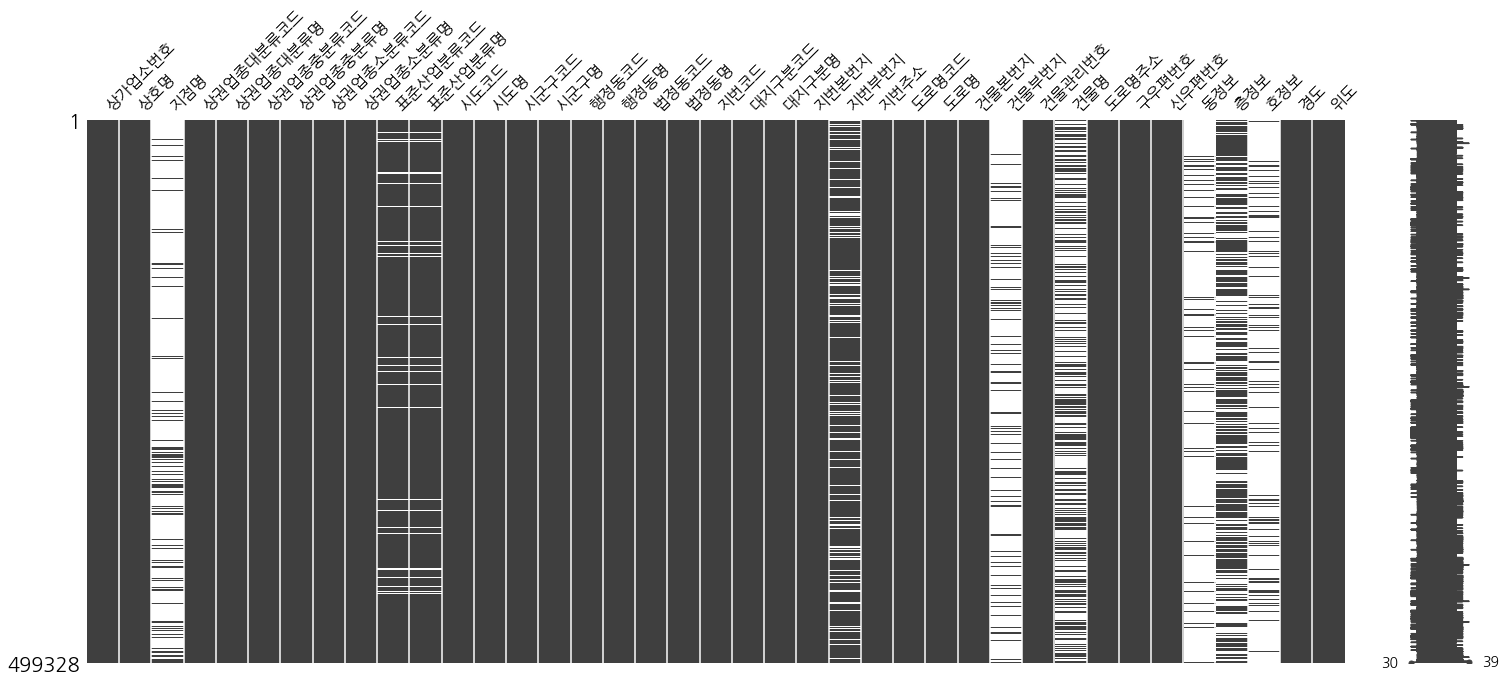

In [6]:
msno.matrix(shop_201806)

<AxesSubplot:>

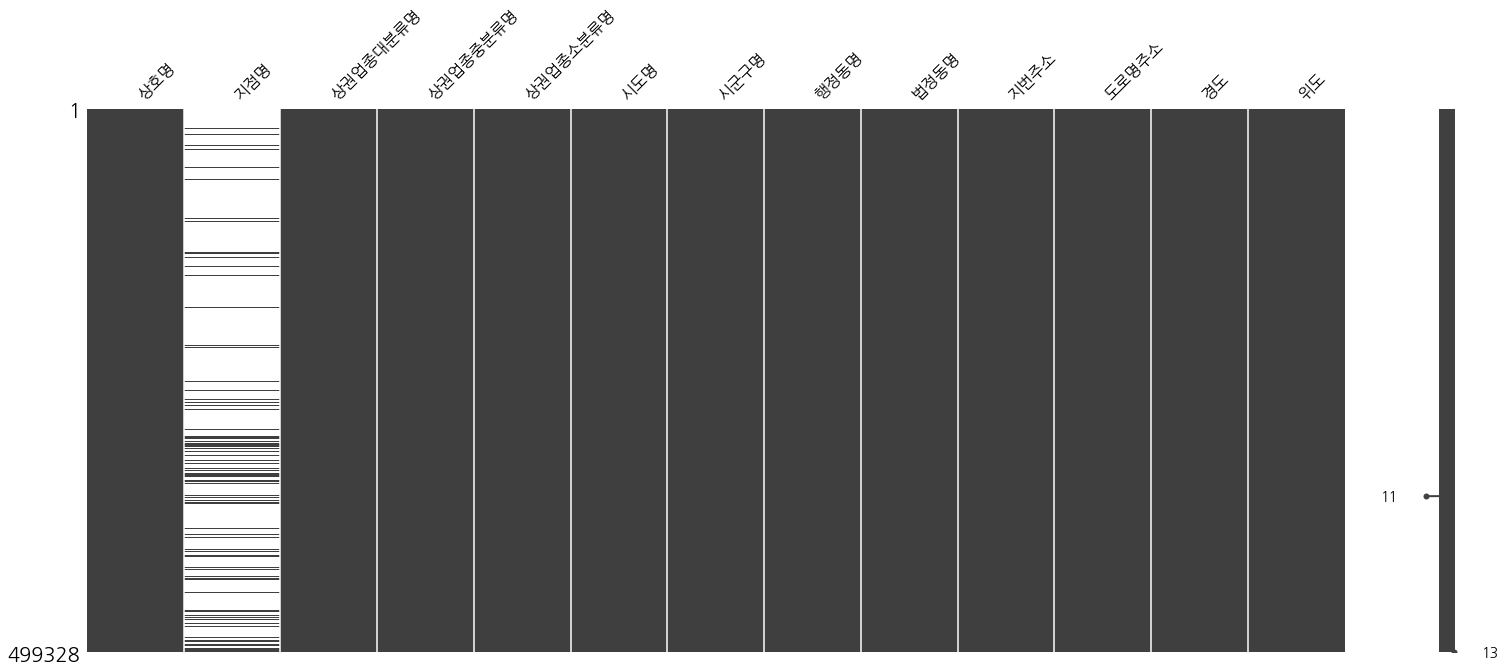

In [7]:
msno.matrix(shop_2018_06)

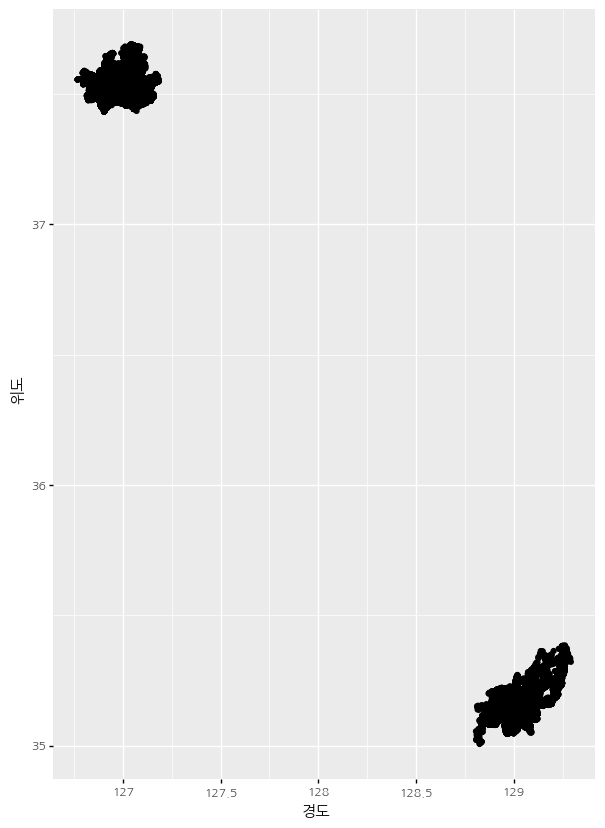

<ggplot: (103503387526)>

In [8]:
ggplot(shop_2018_06, aes(x='경도',y='위도'))\
    + geom_point() \
    + theme(text=element_text(family='NanumGothic'), figure_size=(7,10))

<AxesSubplot:xlabel='경도', ylabel='위도'>

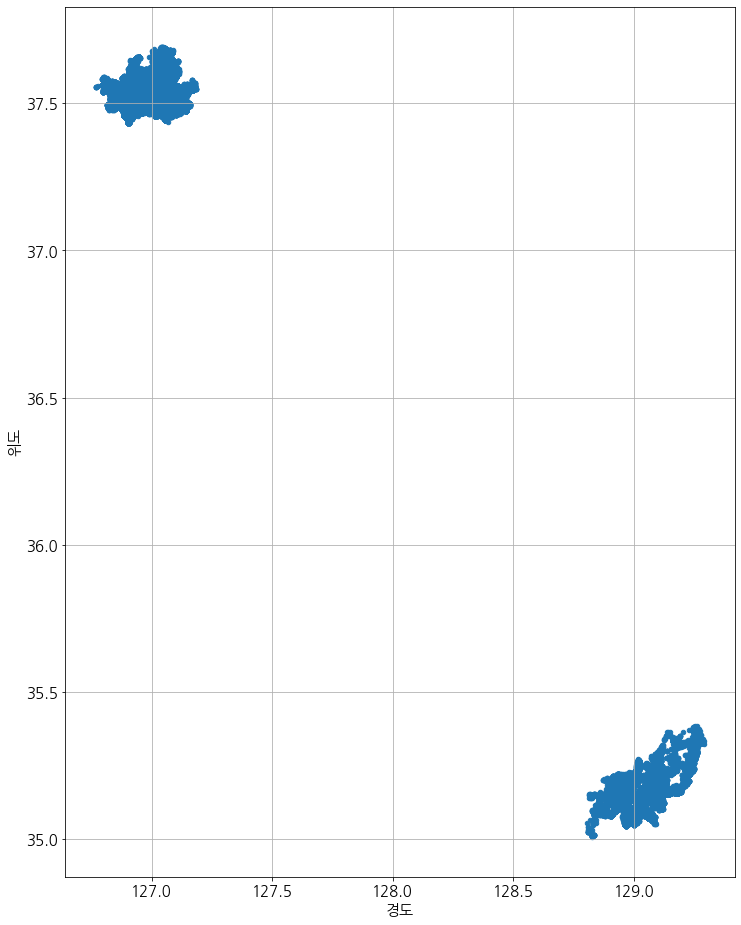

In [9]:
shop_2018_06.plot.scatter(x='경도',y='위도', grid=True, figsize=(12, 16))

In [10]:
# 데이터 시각화 결과, 서울과 부산에 밀집되어 있으므로 서울과 그 이외의 데이터로 나눈다.
# 지번주소가 '서울'로 시작하는 데이터 추출
shop_seoul = shop_2018_06[shop_2018_06['지번주소'].str.startswith('서울')]
shop_seoul

상호명         지점명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명 시군구명  \
0              와라와라호프         NaN       음식      유흥주점        호프/맥주  서울특별시  강남구   
1       커피빈코리아선릉로93길점  코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구   
2                프로포즈         NaN       음식      유흥주점        호프/맥주  서울특별시  금천구   
4            가락사우나내스낵         NaN    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   
5                허술한집         NaN       음식        분식       라면김밥분식  서울특별시  강서구   
...               ...         ...      ...       ...          ...    ...  ...   
499323       배스킨라빈스31     건대스타시티점       음식     패스트푸드      아이스크림판매  서울특별시  광진구   
499324           본도시락        본설렁탕       음식        한식         설렁탕집  서울특별시  강동구   
499325         체크페이먼트         NaN       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구   
499326          마젠타네일         NaN    생활서비스   이/미용/건강       발/네일케어  서울특별시  마포구   
499327           GS25       역촌대로점       소매     종합소매점          편의점  서울특별시  은평구   

        행정동명 법정동명                  지번주소                 도로명주소          경도  \
0       대치1동  대치동     서울특별시 강남구 대치동 604  서울특별시 강남구 남부순환로 2933  127.061026   
1       역삼1동  역삼동  서울특별시 강남구 역삼동 696-42    서울특별시 강남구 선릉로93길 6  127.047883   
2       독산3동  독산동   서울특별시 금천구 독산동 162-1    서울특별시 금천구 가산로 34-6  126.899220   
4        석촌동  석촌동     서울특별시 송파구 석촌동 256      서울특별시 송파구 가락로 71  127.104071   
5        공항동  공항동   서울특별시 강서구 공항동 45-89    서울특별시 강서구 공항대로3길 9  126.809957   
...      ...  ...                   ...                   ...         ...   
499323  자양3동  자양동   서울특별시 광진구 자양동 227-7    서울특별시 광진구 아차산로 262  127.072944   
499324   강일동  상일동     서울특별시 강동구 상일동 502    서울특별시 강동구 상일로6길 39  127.175331   
499325  대치4동  대치동     서울특별시 강남구 대치동 905   서울특별시 강남구 역삼로69길 10  127.054001   
499326   아현동  공덕동     서울특별시 마포구 공덕동 463    서울특별시 마포구 마포대로 173  126.954442   
499327   역촌동  역촌동     서울특별시 은평구 역촌동 9-7      서울특별시 은평구 연서로 92  126.915538   

               위도  
0       37.493922  
1       37.505675  
2       37.471711  
4       37.500249  
5       37.562013  
...           ...  
499323  37.536997  
499324  37.549794  
499325  37.502210  
499326  37.549892  
499327  37.607334  

[345268 rows x 13 columns]

In [11]:
# '~' 는 ~가 아닌 것을 의미한다.
# 지번주소가 서울이 아닌 데이터 추출
shop_etc = shop_2018_06[~shop_2018_06['지번주소'].str.startswith('서울')]
shop_etc

상호명   지점명 상권업종대분류명   상권업종중분류명   상권업종소분류명    시도명  시군구명  행정동명  \
3       싱싱커피&토스트   NaN       음식      패스트푸드      토스트전문  부산광역시   사상구   괘법동   
22        경부할인마트   NaN       소매      종합소매점       종합소매  부산광역시    동구  초량6동   
23           마니쩜   NaN       음식       유흥주점      호프/맥주  부산광역시  부산진구  가야1동   
24         경주아구찜   NaN       음식     일식/수산물       아구전문  부산광역시   수영구  남천1동   
30      동해제일산오징어   NaN       음식     일식/수산물     낙지/오징어  부산광역시   동래구  온천3동   
...          ...   ...      ...        ...        ...    ...   ...   ...   
499305      보라헤어   NaN    생활서비스    이/미용/건강      여성미용실  부산광역시   사상구  주례2동   
499310    호텔엘레펀트   NaN       숙박  모텔/여관/여인숙  모텔/여관/여인숙  부산광역시  부산진구  부전2동   
499311      포항물회   7.7       음식     일식/수산물         횟집  부산광역시   영도구   남항동   
499318       참누리   NaN    생활서비스   세탁/가사서비스      청소/소독  부산광역시  해운대구   좌3동   
499321     봉수아피자  연산동점       음식      패스트푸드       피자전문  부산광역시   연제구  연산8동   

         법정동명                   지번주소                        도로명주소          경도  \
3         괘법동      부산광역시 사상구 괘법동 578             부산광역시 사상구 괘감로 37  128.980455   
22        초량동   부산광역시 동구 초량동 794-681             부산광역시 동구 망양로 593  129.034599   
23        가야동   부산광역시 부산진구 가야동 450-2          부산광역시 부산진구 대학로 64-1  129.034302   
24        남천동   부산광역시 수영구 남천동 357-10          부산광역시 수영구 수영로 381-8  129.106330   
30        온천동   부산광역시 동래구 온천동 1380-2     부산광역시 동래구 아시아드대로220번길 30  129.068324   
...       ...                    ...                          ...         ...   
499305    주례동     부산광역시 사상구 주례동 3-16       부산광역시 사상구 백양대로342번길 22  129.014460   
499310    부전동  부산광역시 부산진구 부전동 519-36  부산광역시 부산진구 중앙대로691번가길 24-12  129.056079   
499311  대교동1가  부산광역시 영도구 대교동1가 106-7       부산광역시 영도구 절영로36번길 14-1  129.038401   
499318     좌동     부산광역시 해운대구 좌동 1375      부산광역시 해운대구 좌동순환로99번길 22  129.166905   
499321    연산동   부산광역시 연제구 연산동 339-14             부산광역시 연제구 연동로 21  129.093382   

               위도  
3       35.159774  
22      35.123196  
23      35.150069  
24      35.141176  
30      35.202902  
...           ...  
499305  35.154509  
499310  35.155344  
499311  35.091686  
499318  35.177375  
499321  35.187174  

[154060 rows x 13 columns]

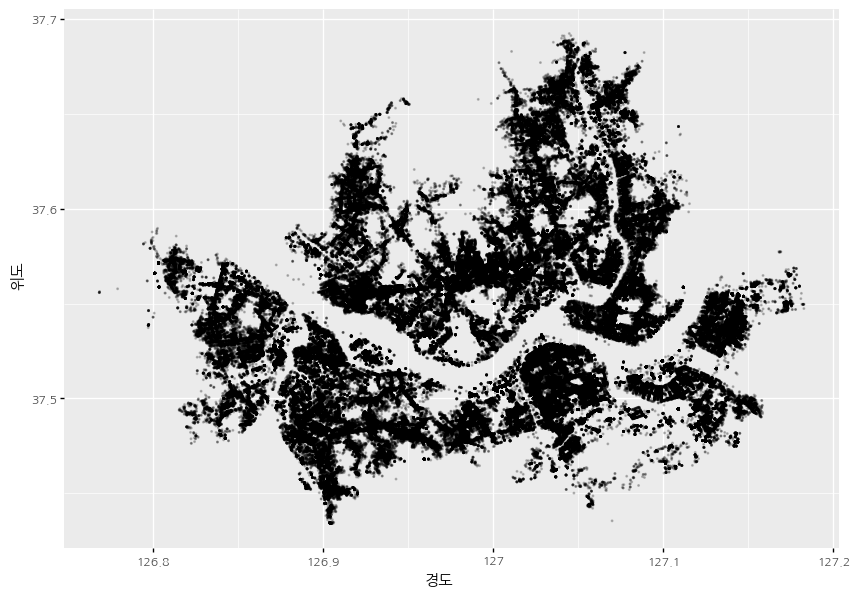

<ggplot: (-9223371933354136930)>

In [12]:
ggplot(shop_seoul, aes(x='경도',y='위도'))\
    + geom_point(size=0.2, alpha=0.2) \
    + theme(text=element_text(family='NanumGothic'), figure_size=(10, 7))

<AxesSubplot:xlabel='경도', ylabel='위도'>

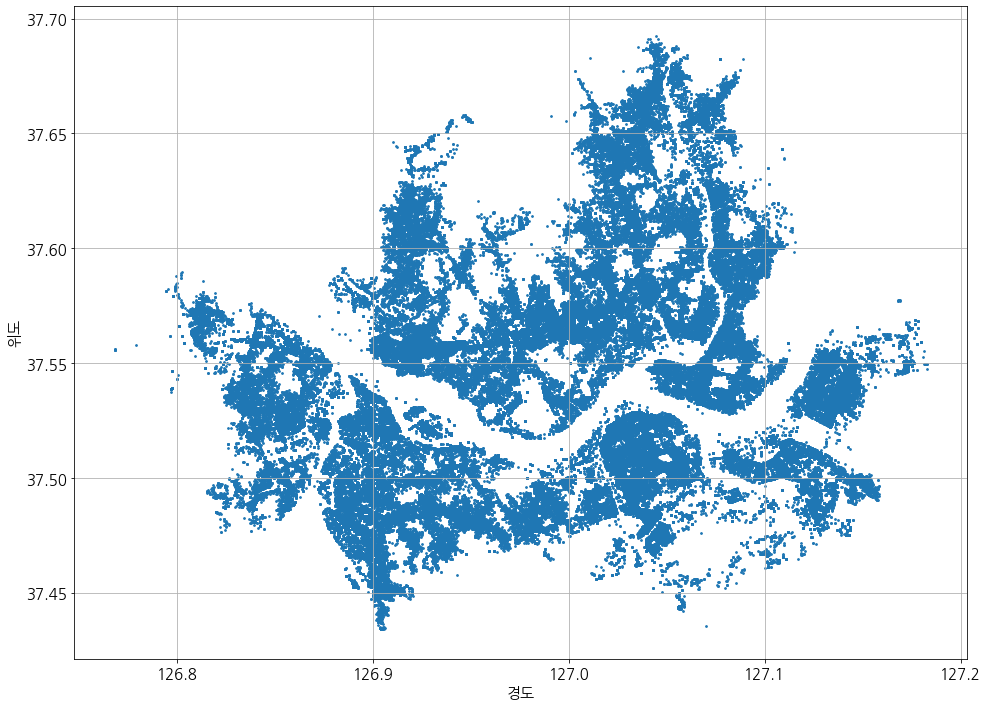

In [13]:
shop_seoul.plot.scatter(x='경도',y='위도',grid=True, figsize=(16,12),s=3)

In [14]:
# 데이터프레임의 도로명주소를 활용해서 '시도', '구군' 열을 만든다.
# str.split() 함수에 expand=True 옵션을 지정해서 구분자를 경계로 
# 문자열을 서로 다른 열(데이터프레임)으로 구분해서 '시도' 열과 구군' 열을 만든다.
print(type(shop_seoul[:1]['도로명주소'].str.split(' ', expand=True)))
print(shop_seoul[:1]['도로명주소'].str.split(' ', expand=True)[0]) # 시도
print(shop_seoul[:1]['도로명주소'].str.split(' ', expand=True)[1]) # 구군
print(shop_seoul[:1]['도로명주소'].str.split(' ', expand=True)[2]) 

shop_2018_06['시도'] = shop_seoul[:]['도로명주소'].str.split(' ', expand=True)[0]
shop_2018_06['구군'] = shop_seoul[:]['도로명주소'].str.split(' ', expand=True)[1]
shop_2018_06.columns

<class 'pandas.core.frame.DataFrame'>
0    서울특별시
Name: 0, dtype: object
0    강남구
Name: 1, dtype: object
0    남부순환로
Name: 2, dtype: object


Index(['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', '행정동명',
       '법정동명', '지번주소', '도로명주소', '경도', '위도', '시도', '구군'],
      dtype='object')

In [15]:
# '시도' 열과 '구군' 열이 추가된 데이터 프레임에서 서울만 추출해 다시 데이터 프레임을 만든다.
shop_seoul = shop_2018_06[shop_2018_06['지번주소'].str.startswith('서울')]
shop_seoul

상호명         지점명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명 시군구명  \
0              와라와라호프         NaN       음식      유흥주점        호프/맥주  서울특별시  강남구   
1       커피빈코리아선릉로93길점  코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구   
2                프로포즈         NaN       음식      유흥주점        호프/맥주  서울특별시  금천구   
4            가락사우나내스낵         NaN    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   
5                허술한집         NaN       음식        분식       라면김밥분식  서울특별시  강서구   
...               ...         ...      ...       ...          ...    ...  ...   
499323       배스킨라빈스31     건대스타시티점       음식     패스트푸드      아이스크림판매  서울특별시  광진구   
499324           본도시락        본설렁탕       음식        한식         설렁탕집  서울특별시  강동구   
499325         체크페이먼트         NaN       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구   
499326          마젠타네일         NaN    생활서비스   이/미용/건강       발/네일케어  서울특별시  마포구   
499327           GS25       역촌대로점       소매     종합소매점          편의점  서울특별시  은평구   

        행정동명 법정동명                  지번주소                 도로명주소          경도  \
0       대치1동  대치동     서울특별시 강남구 대치동 604  서울특별시 강남구 남부순환로 2933  127.061026   
1       역삼1동  역삼동  서울특별시 강남구 역삼동 696-42    서울특별시 강남구 선릉로93길 6  127.047883   
2       독산3동  독산동   서울특별시 금천구 독산동 162-1    서울특별시 금천구 가산로 34-6  126.899220   
4        석촌동  석촌동     서울특별시 송파구 석촌동 256      서울특별시 송파구 가락로 71  127.104071   
5        공항동  공항동   서울특별시 강서구 공항동 45-89    서울특별시 강서구 공항대로3길 9  126.809957   
...      ...  ...                   ...                   ...         ...   
499323  자양3동  자양동   서울특별시 광진구 자양동 227-7    서울특별시 광진구 아차산로 262  127.072944   
499324   강일동  상일동     서울특별시 강동구 상일동 502    서울특별시 강동구 상일로6길 39  127.175331   
499325  대치4동  대치동     서울특별시 강남구 대치동 905   서울특별시 강남구 역삼로69길 10  127.054001   
499326   아현동  공덕동     서울특별시 마포구 공덕동 463    서울특별시 마포구 마포대로 173  126.954442   
499327   역촌동  역촌동     서울특별시 은평구 역촌동 9-7      서울특별시 은평구 연서로 92  126.915538   

               위도     시도   구군  
0       37.493922  서울특별시  강남구  
1       37.505675  서울특별시  강남구  
2       37.471711  서울특별시  금천구  
4       37.500249  서울특별시  송파구  
5       37.562013  서울특별시  강서구  
...           ...    ...  ...  
499323  37.536997  서울특별시  광진구  
499324  37.549794  서울특별시  강동구  
499325  37.502210  서울특별시  강남구  
499326  37.549892  서울특별시  마포구  
499327  37.607334  서울특별시  은평구  

[345268 rows x 15 columns]

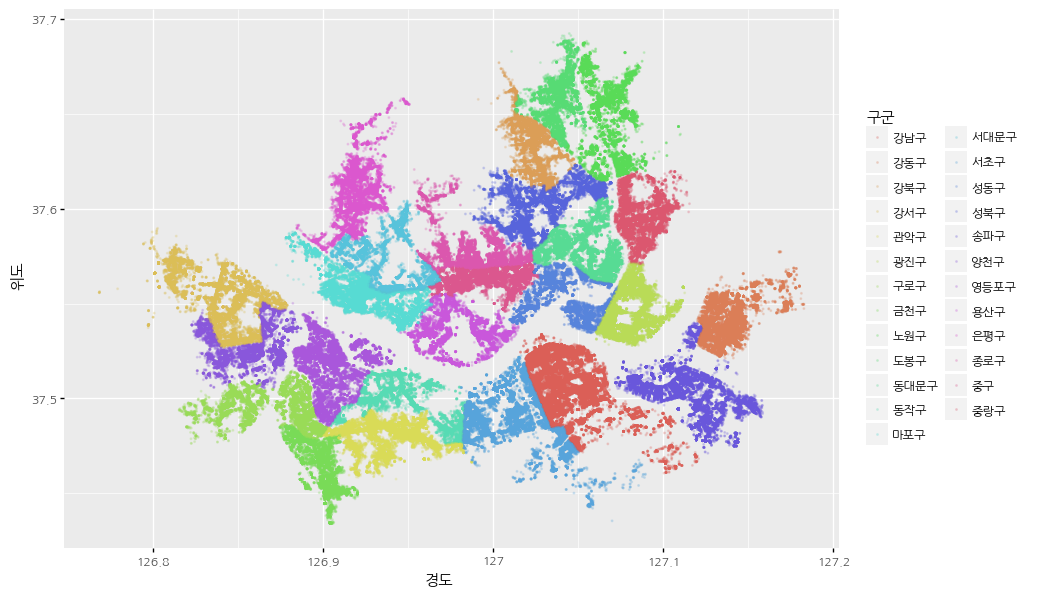

<ggplot: (103502330828)>

In [16]:
ggplot(shop_seoul, aes(x='경도',y='위도', color='구군'))\
    + geom_point(size=0.2, alpha=0.2) \
    + theme(text=element_text(family='NanumGothic'), figure_size=(10, 7))

<AxesSubplot:xlabel='경도', ylabel='위도'>

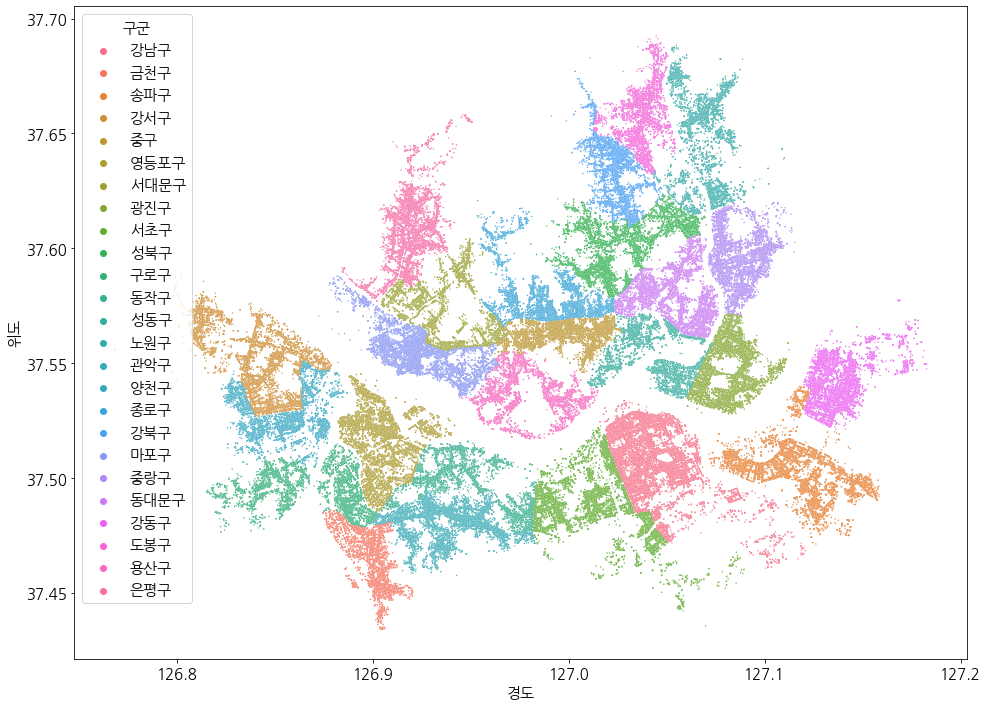

In [17]:
# seaborn 라이브러리를 이용한 시각화
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_seoul, x='경도', y='위도', hue='구군',s=2)

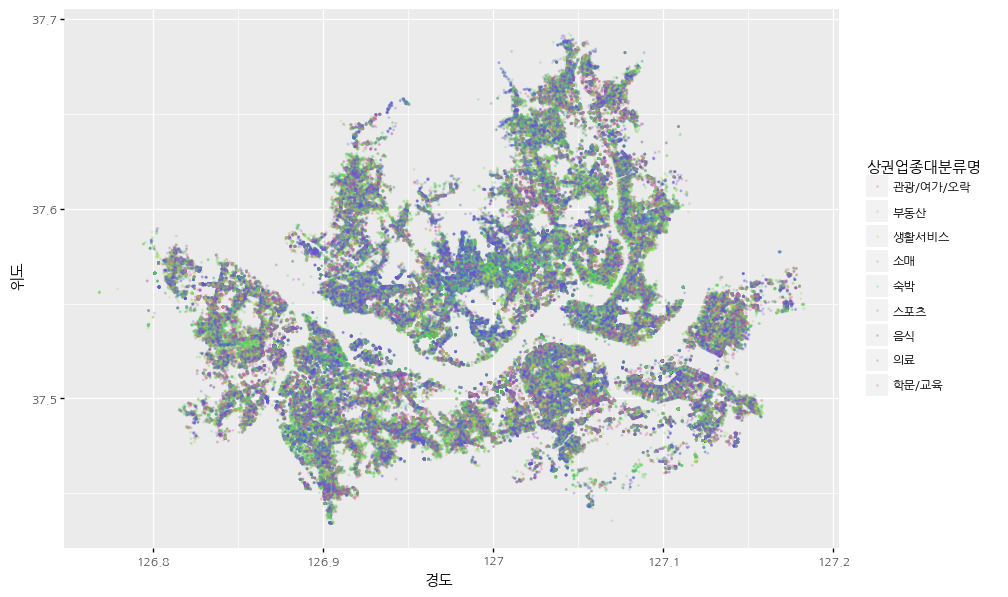

<ggplot: (-9223371933231143203)>

In [18]:
ggplot(shop_seoul, aes(x='경도',y='위도', color='상권업종대분류명'))\
    + geom_point(size=0.2, alpha=0.2) \
    + theme(text=element_text(family='NanumGothic'), figure_size=(10, 7))

<AxesSubplot:xlabel='경도', ylabel='위도'>

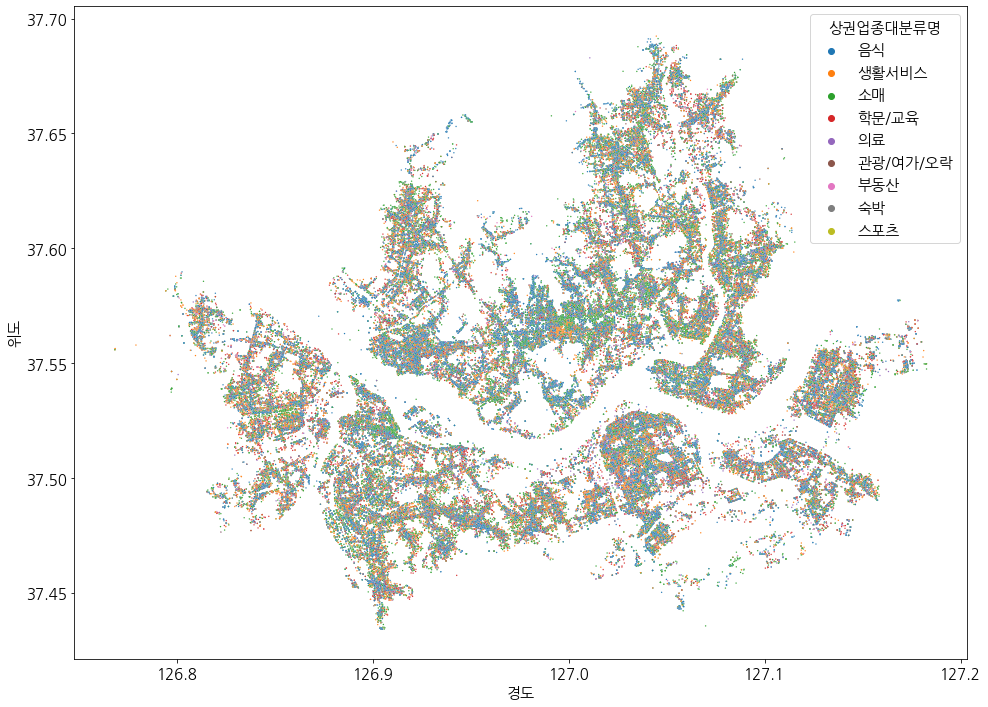

In [19]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_seoul, x='경도', y='위도', hue='상권업종대분류명',s=2)

In [20]:
# 학문/교육과 관련된 정보만 추출하기
shop_seoul_edu = shop_seoul[shop_seoul['상권업종대분류명'] == '학문/교육']
shop_seoul_edu

상호명      지점명 상권업종대분류명    상권업종중분류명   상권업종소분류명    시도명  시군구명  행정동명  \
52         안재형영어      NaN    학문/교육       학원-어학  학원-외국어/어학  서울특별시   양천구   목5동   
67           정아트      NaN    학문/교육   학원-음악미술무용   서예/서화/미술  서울특별시   강서구   염창동   
86      GIA보석교육원      NaN    학문/교육  학원-자격/국가고시    학원-보석감정  서울특별시   강남구  압구정동   
120        경찰태권도      NaN    학문/교육   학원-예능취미체육       태권도장  서울특별시   성북구  길음1동   
142      파랑새어린이집      NaN    학문/교육        유아교육       어린이집  서울특별시   도봉구   창1동   
...          ...      ...      ...         ...        ...    ...   ...   ...   
499268     점프셈교실     뉴스터디    학문/교육   학원-보습교습입시      학원-입시  서울특별시   강서구   염창동   
499278     점프셈교실  IPN보떼미용    학문/교육   학원-창업취업취미    학원-네일아트  서울특별시   강동구  천호2동   
499288     점프셈교실    온누리보습    학문/교육   학원-보습교습입시      학원-입시  서울특별시   관악구   미성동   
499289     점프셈교실    일신제2관    학문/교육   학원-보습교습입시      학원-입시  서울특별시  영등포구  양평1동   
499315     점프셈교실    키스톤보습    학문/교육   학원-보습교습입시      학원-입시  서울특별시   관악구   조원동   

         법정동명                   지번주소                 도로명주소          경도  \
52         목동    서울특별시 양천구 목동 905-34  서울특별시 양천구 목동서로 133-2  126.875973   
67        염창동    서울특별시 강서구 염창동 184-8  서울특별시 강서구 양천로73가길 21  126.873645   
86        신사동    서울특별시 강남구 신사동 639-3    서울특별시 강남구 압구정로 320  127.036437   
120       길음동   서울특별시 성북구 길음동 1283-4      서울특별시 성북구 길음로 20  127.023020   
142        창동       서울특별시 도봉구 창동 374     서울특별시 도봉구 덕릉로 329  127.045486   
...       ...                    ...                   ...         ...   
499268    염창동   서울특별시 강서구 염창동 242-29     서울특별시 강서구 양천로 623  126.867243   
499278    천호동    서울특별시 강동구 천호동 456-2    서울특별시 강동구 천호대로 993  127.122785   
499288    신림동    서울특별시 관악구 신림동 753-2  서울특별시 관악구 문성로16가길 43  126.914883   
499289  양평동1가  서울특별시 영등포구 양평동1가 9-32     서울특별시 영등포구 선유로 88  126.890194   
499315    신림동   서울특별시 관악구 신림동 1652-9     서울특별시 관악구 조원로6길 1  126.905305   

               위도     시도    구군  
52      37.531592  서울특별시   양천구  
67      37.550924  서울특별시   강서구  
86      37.528532  서울특별시   강남구  
120     37.604749  서울특별시   성북구  
142     37.644831  서울특별시   도봉구  
...           ...    ...   ...  
499268  37.554476  서울특별시   강서구  
499278  37.539198  서울특별시   강동구  
499288  37.475271  서울특별시   관악구  
499289  37.521725  서울특별시  영등포구  
499315  37.483139  서울특별시   관악구  

[27717 rows x 15 columns]

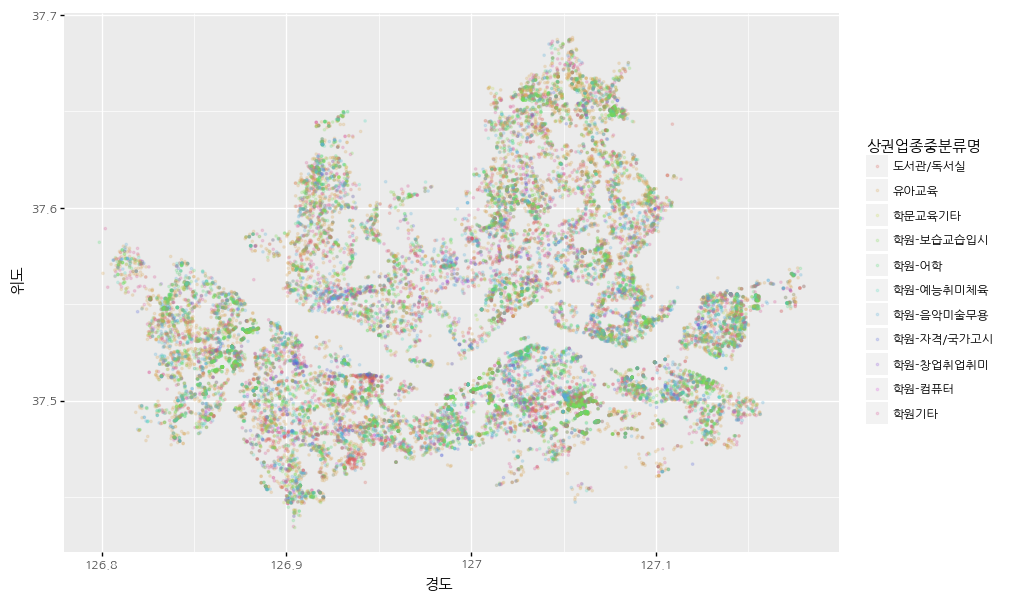

<ggplot: (103625182016)>

In [21]:
ggplot(shop_seoul_edu, aes(x='경도',y='위도', color='상권업종중분류명'))\
    + geom_point(size=0.5, alpha=0.2) \
    + theme(text=element_text(family='NanumGothic'), figure_size=(10, 7))

<AxesSubplot:xlabel='경도', ylabel='위도'>

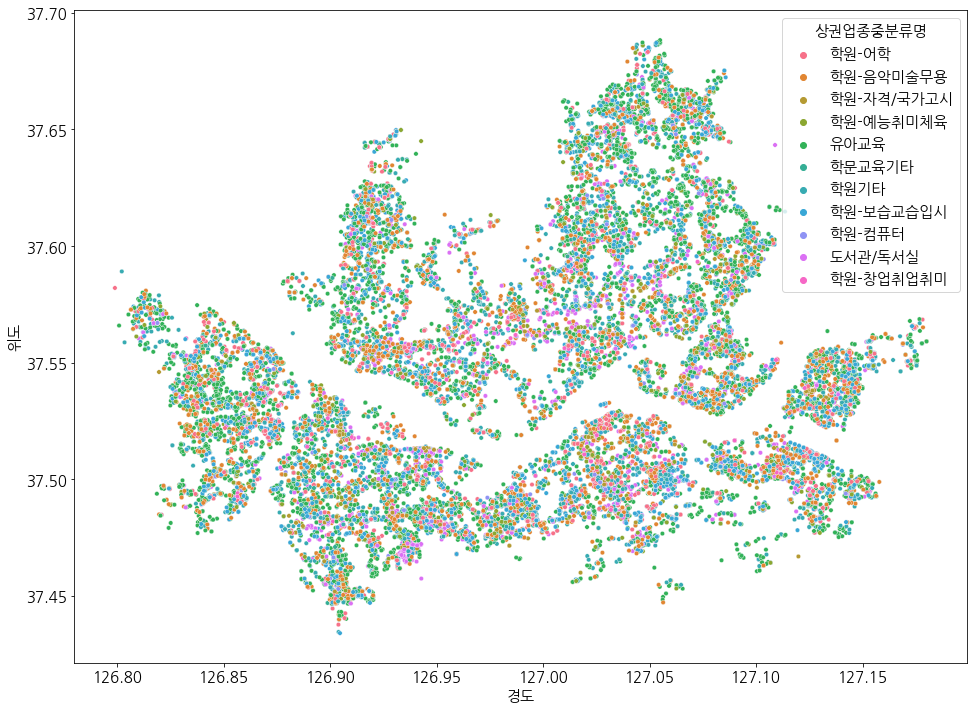

In [22]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_seoul_edu, x='경도', y='위도', hue='상권업종중분류명',s=20)

In [23]:
# 부동산과 관련된 정보만 추출
shop_etc_realty = shop_etc[shop_etc['상권업종대분류명'] == '부동산']
shop_etc_realty


상호명  지점명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명  시군구명  행정동명  \
97               참조은부동산  NaN      부동산    부동산중개    부동산중개  부산광역시  부산진구  개금2동   
99        신라부동산공인중개사사무소  NaN      부동산    부동산중개    부동산중개  부산광역시  해운대구   좌2동   
101          수목공인중개사사무소  NaN      부동산    부동산중개    부동산중개  부산광역시  부산진구  부전2동   
111           괴정공인중개사무소  NaN      부동산    부동산중개    부동산중개  부산광역시   사하구  괴정1동   
164          사하공인중개사사무소  NaN      부동산    부동산중개    부동산중개  부산광역시   사하구  괴정4동   
...                 ...  ...      ...      ...      ...    ...   ...   ...   
497771         뉴득성공인중개사  NaN      부동산    부동산중개    부동산중개  부산광역시   강서구  대저1동   
498089           김형준부동산  NaN      부동산    부동산중개    부동산중개  부산광역시    북구  구포1동   
498115  GS자이부동산공인중개사사무소  NaN      부동산    부동산중개    부동산중개  부산광역시  해운대구   우2동   
498231     대한리더스부동산중개법인  NaN      부동산    부동산중개    부동산중개  부산광역시   금정구  부곡3동   
498556              이승용  NaN      부동산    부동산중개    부동산중개  부산광역시   강서구  대저1동   

        법정동명                    지번주소                    도로명주소          경도  \
97       개금동    부산광역시 부산진구 개금동 618-2        부산광역시 부산진구 복지로 70  129.019662   
99        좌동      부산광역시 해운대구 좌동 1323     부산광역시 해운대구 좌동순환로 280  129.182346   
101      부전동    부산광역시 부산진구 부전동 525-8  부산광역시 부산진구 신천대로102번길 37  129.055782   
111      괴정동     부산광역시 사하구 괴정동 740-1       부산광역시 사하구 낙동대로 261  128.988567   
164      괴정동    부산광역시 사하구 괴정동 552-14        부산광역시 사하구 괴정로 219  128.985523   
...      ...                     ...                      ...         ...   
497771  대저1동  부산광역시 강서구 대저1동 2342-20      부산광역시 강서구 대저로 278-1  128.982394   
498089   구포동     부산광역시 북구 구포동 131-10           부산광역시 북구 덕천로 8  129.006062   
498115    우동      부산광역시 해운대구 우동 1527      부산광역시 해운대구 해운대로 435  129.142995   
498231   부곡동     부산광역시 금정구 부곡동 64-23  부산광역시 금정구 중앙대로1763번길 42  129.090680   
498556  대저1동    부산광역시 강서구 대저1동 603-1      부산광역시 강서구 대저중앙로 268  128.976212   

               위도  
97      35.147471  
99      35.170916  
101     35.153670  
111     35.098945  
164     35.097581  
...           ...  
497771  35.212355  
498089  35.206941  
498115  35.164921  
498231  35.242120  
498556  35.220779  

[4571 rows x 13 columns]

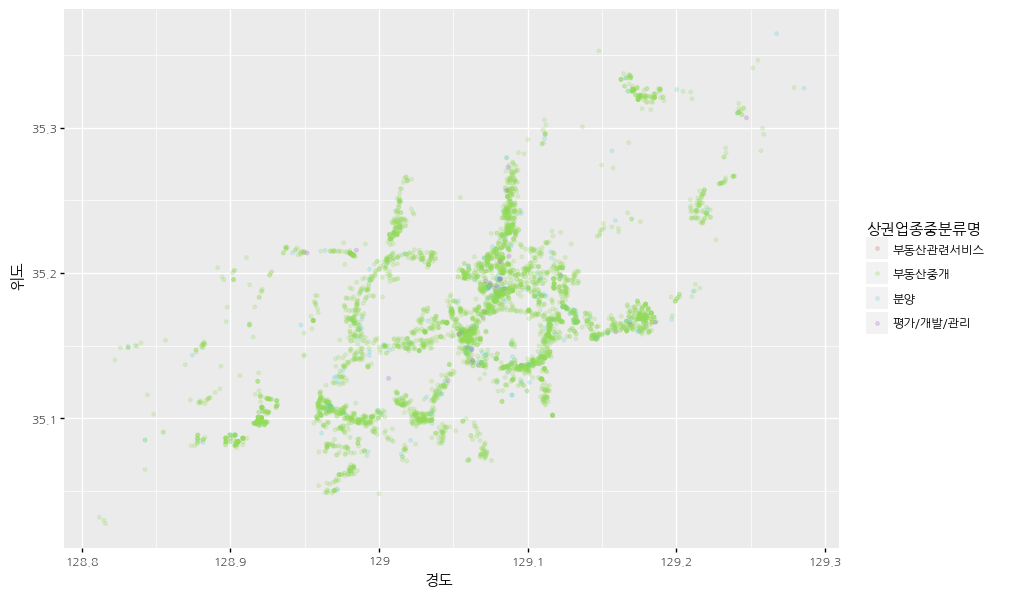

<ggplot: (-9223371933352209762)>

In [24]:
ggplot(shop_etc_realty, aes(x='경도',y='위도', color='상권업종중분류명'))\
    + geom_point(size=1, alpha=0.2) \
    + theme(text=element_text(family='NanumGothic'), figure_size=(10, 7))

<AxesSubplot:xlabel='경도', ylabel='위도'>

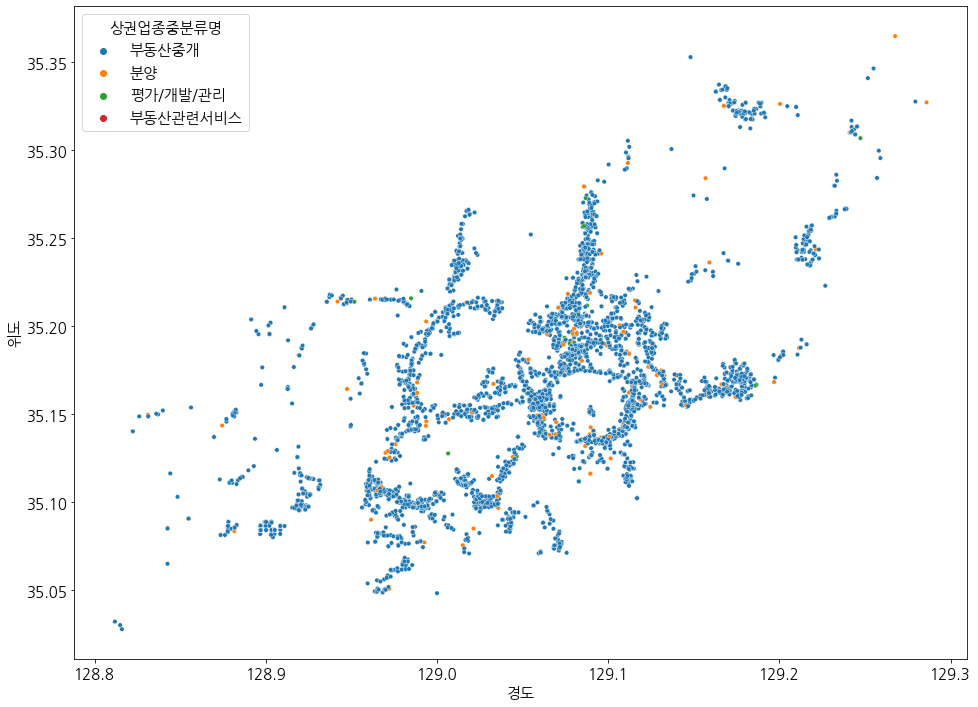

In [25]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_etc_realty, x='경도', y='위도', hue='상권업종중분류명',s=20)

In [26]:
# 학원-컴퓨터 데이터 추출하기
shop_seoul_com = shop_seoul[shop_seoul['상권업종중분류명'] == '학원-컴퓨터']
shop_seoul_com

상호명       지점명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명  시군구명    행정동명  \
442       아이비씨에듀케이션       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시   은평구    불광1동   
2687    서원초등학교컴퓨터교실       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시   서초구    반포1동   
3678       이찬진컴퓨터교실       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시   성북구    정릉1동   
3872        백상컴퓨터학원       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시   구로구    구로4동   
5517        보성컴퓨터학원       NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시   성북구    장위1동   
...             ...       ...      ...      ...      ...    ...   ...     ...   
499152        점프셈교실  피씨정비네트워크    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시   마포구     합정동   
499153        점프셈교실      왕컴퓨터    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시   은평구    응암3동   
499154        점프셈교실    벽산정보처리    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시   노원구  상계6.7동   
499155        점프셈교실  신촌아이디컴퓨터    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  서대문구     신촌동   
499156        점프셈교실     영명컴퓨터    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시   마포구     아현동   

       법정동명                  지번주소                 도로명주소          경도  \
442     불광동   서울특별시 은평구 불광동 272-2      서울특별시 은평구 불광로 51  126.930696   
2687    반포동    서울특별시 서초구 반포동 30-8     서울특별시 서초구 고무래로 63  127.014605   
3678    정릉동  서울특별시 성북구 정릉동 16-282  서울특별시 성북구 정릉로38다길 29  127.017025   
3872    구로동     서울특별시 구로구 구로동 314  서울특별시 구로구 구로중앙로7길 28  126.889592   
5517    장위동  서울특별시 성북구 장위동 230-91   서울특별시 성북구 장위로15길 16  127.041859   
...     ...                   ...                   ...         ...   
499152  합정동  서울특별시 마포구 합정동 412-20    서울특별시 마포구 독막로 33-1  126.917321   
499153  응암동  서울특별시 은평구 응암동 576-48     서울특별시 은평구 응암로 204  126.917419   
499154  상계동   서울특별시 노원구 상계동 763-4    서울특별시 노원구 동일로 1335  127.062251   
499155  창천동  서울특별시 서대문구 창천동 20-44    서울특별시 서대문구 신촌로 117  126.938941   
499156  공덕동  서울특별시 마포구 공덕동 249-12    서울특별시 마포구 마포대로8길 9  126.953922   

               위도     시도    구군  
442     37.613419  서울특별시   은평구  
2687    37.502429  서울특별시   서초구  
3678    37.601564  서울특별시   성북구  
3872    37.491327  서울특별시   구로구  
5517    37.614905  서울특별시   성북구  
...           ...    ...   ...  
499152  37.548368  서울특별시   마포구  
499153  37.590132  서울특별시   은평구  
499154  37.647993  서울특별시   노원구  
499155  37.556025  서울특별시  서대문구  
499156  37.546617  서울특별시   마포구  

[215 rows x 15 columns]

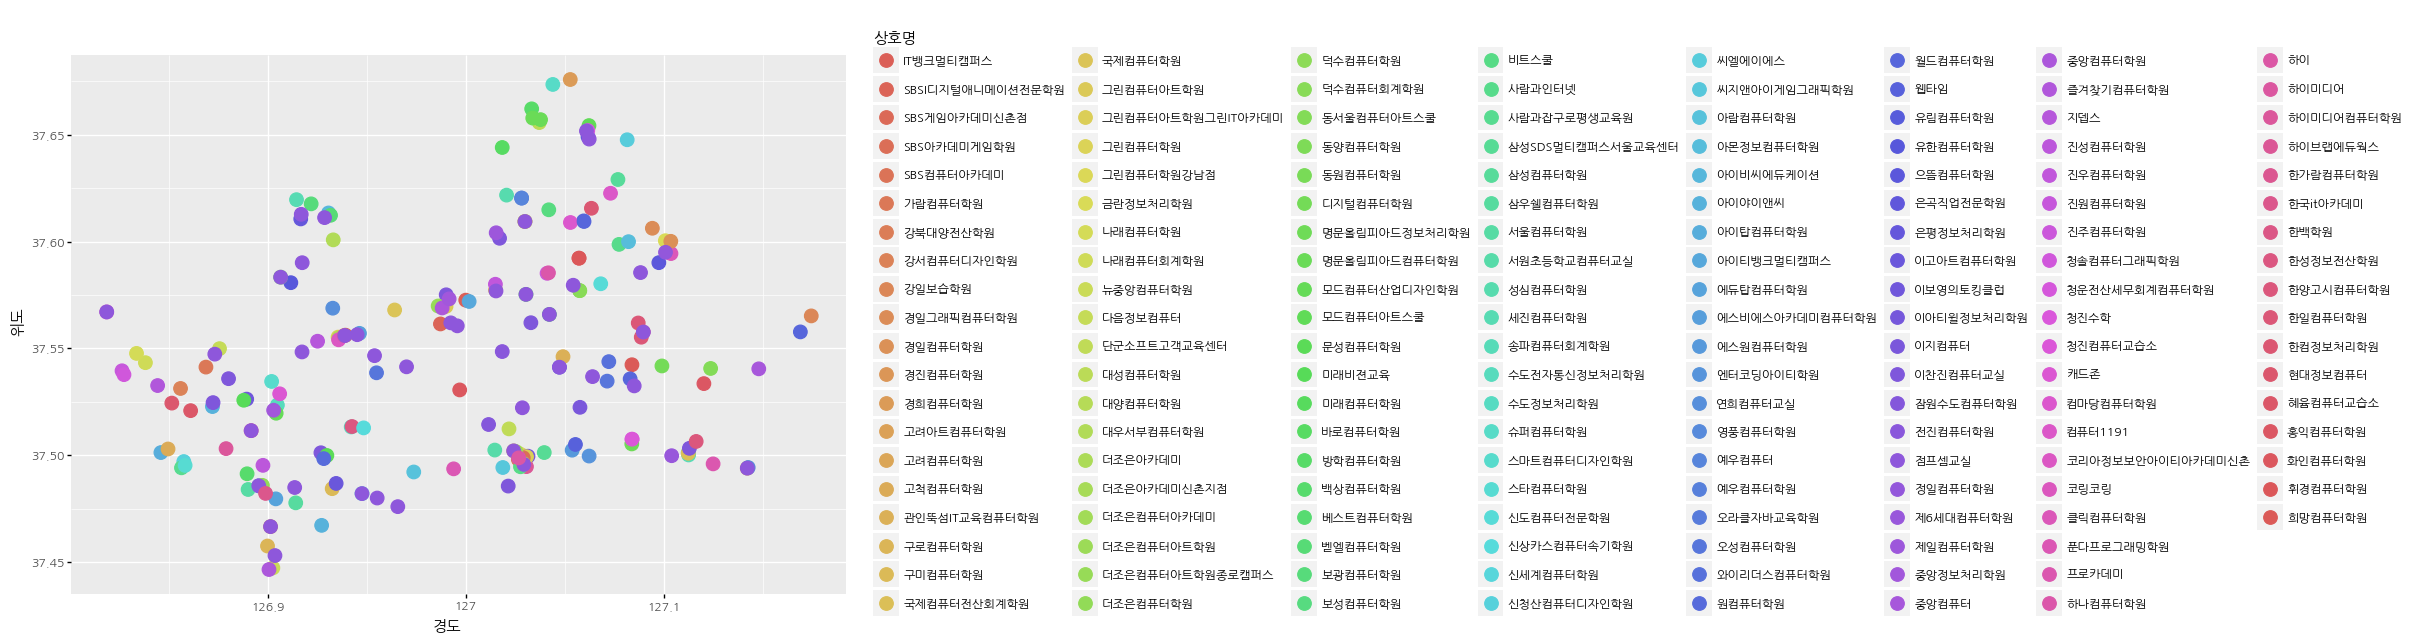

<ggplot: (-9223371933353942100)>

In [27]:
ggplot(shop_seoul_com, aes(x='경도',y='위도', color='상호명'))\
    + geom_point(size=5) \
    + theme(text=element_text(family='NanumGothic'), figure_size=(10, 7))

<AxesSubplot:xlabel='경도', ylabel='위도'>

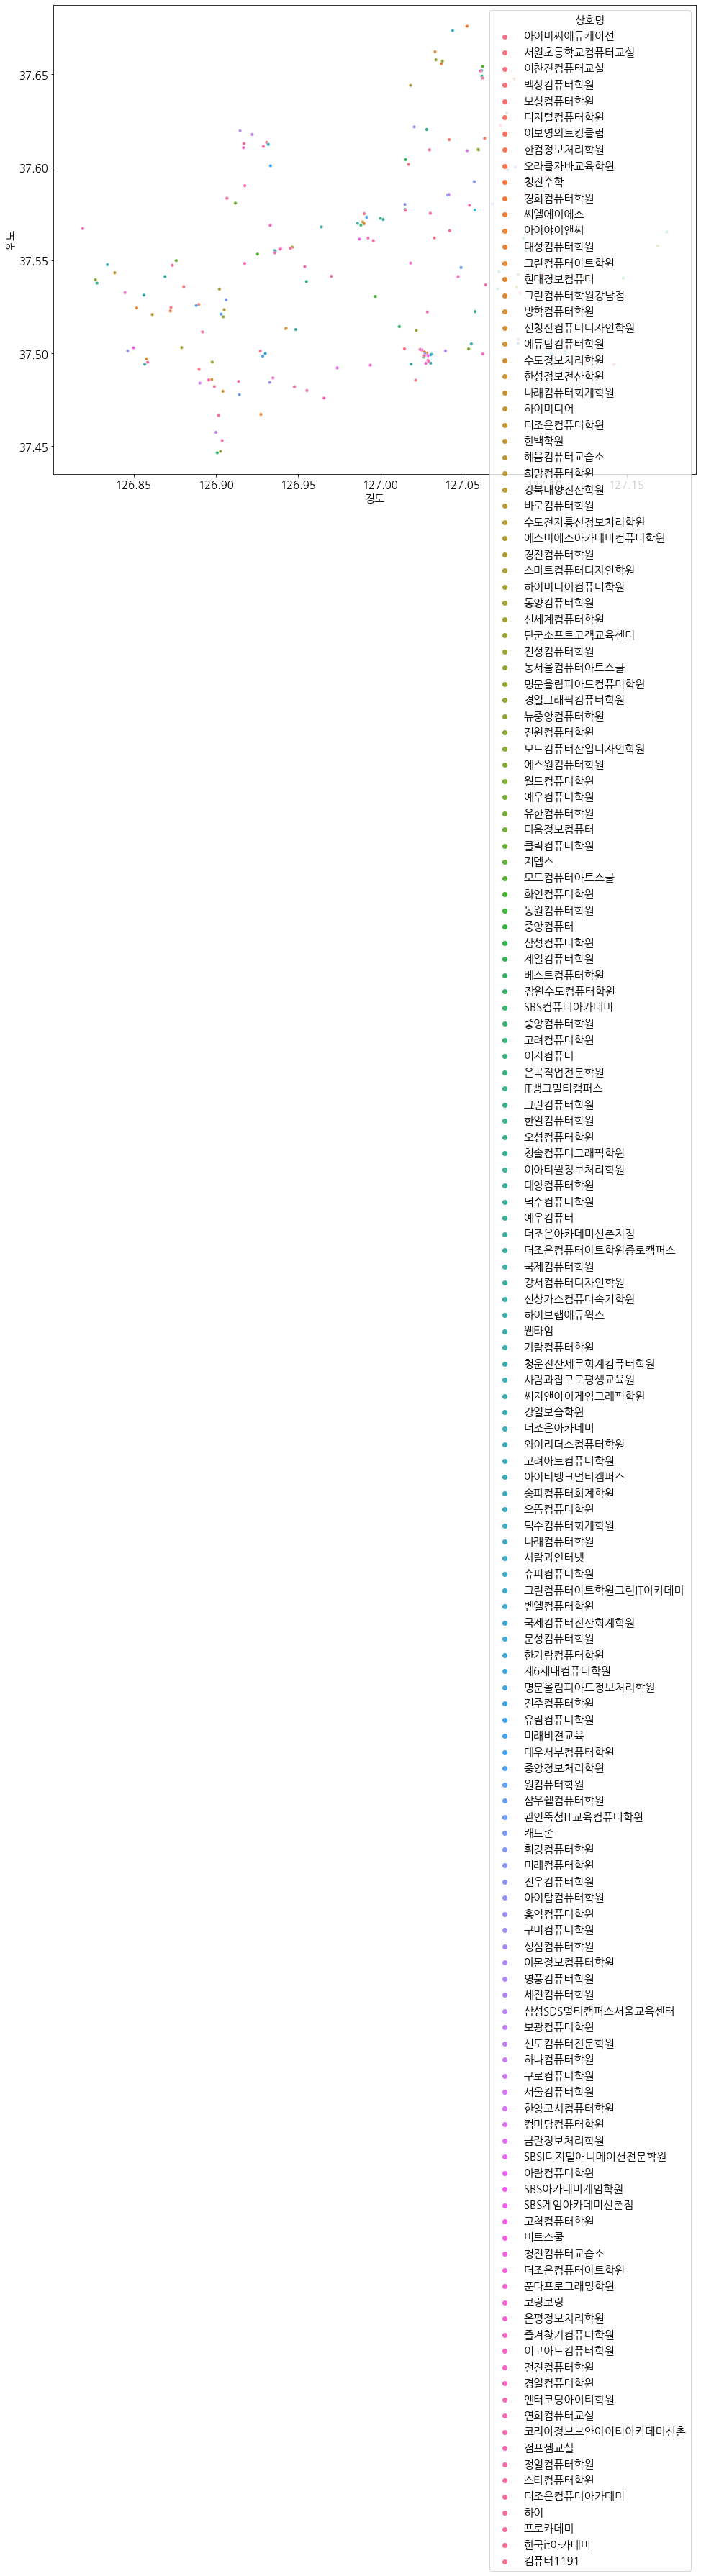

In [28]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_seoul_com, x='경도', y='위도', hue='상호명',s=20)

In [29]:
import folium

In [30]:
data = shop_seoul_com
edu_map = folium.Map(location=[data['위도'].mean(),data['경도'].mean()], zoom_start=12, tiles='Stamen Terrain')

for i in data.index:
    edu_name = data.loc[i, '상호명'] + '-' + data.loc[i, '도로명주소']
    popup = folium.Popup(edu_name, max_width=200)
    folium.Marker(location=[data.loc[i, '위도'], data.loc[i,'경도']], popup=popup).add_to(edu_map)

edu_map.save('./output/edu_map.html')
edu_map

In [31]:
# 커피점/ 카페
shop_seoul_eat = shop_seoul[shop_seoul['상권업종중분류명']== '커피점/카페']
shop_seoul_eat

상호명         지점명 상권업종대분류명 상권업종중분류명     상권업종소분류명    시도명  \
1         커피빈코리아선릉로93길점  코리아선릉로93길점       음식   커피점/카페  커피전문점/카페/다방  서울특별시   
8                 스완카페트         NaN       음식   커피점/카페  커피전문점/카페/다방  서울특별시   
11                   왕실         NaN       음식   커피점/카페  커피전문점/카페/다방  서울특별시   
15                  커피빈      코리아교대점       음식   커피점/카페  커피전문점/카페/다방  서울특별시   
17         고려대학교교육관쎄리오점         NaN       음식   커피점/카페  커피전문점/카페/다방  서울특별시   
...                 ...         ...      ...      ...          ...    ...   
499300  간단하지만특별한화피디Cafe      지오갤러리&       음식   커피점/카페  커피전문점/카페/다방  서울특별시   
499307  간단하지만특별한화피디Cafe       운정갤러리       음식   커피점/카페  커피전문점/카페/다방  서울특별시   
499320             스타벅스       독립문역점       음식   커피점/카페  커피전문점/카페/다방  서울특별시   
499322  간단하지만특별한화피디Cafe         앤아더       음식   커피점/카페  커피전문점/카페/다방  서울특별시   
499325           체크페이먼트         NaN       음식   커피점/카페  커피전문점/카페/다방  서울특별시   

        시군구명    행정동명   법정동명                     지번주소                    도로명주소  \
1        강남구    역삼1동    역삼동     서울특별시 강남구 역삼동 696-42       서울특별시 강남구 선릉로93길 6   
8       영등포구    대림3동    대림동    서울특별시 영등포구 대림동 604-56  서울특별시 영등포구 도신로10가길 11-1   
11        중구      명동   명동2가        서울특별시 중구 명동2가 105      서울특별시 중구 남대문로 52-13   
15       서초구    서초1동    서초동     서울특별시 서초구 서초동 1657-5      서울특별시 서초구 서초중앙로 118   
17       성북구     안암동  안암동5가      서울특별시 성북구 안암동5가 1-2        서울특별시 성북구 안암로 145   
...      ...     ...    ...                      ...                      ...   
499300   광진구    구의2동    구의동       서울특별시 광진구 구의동 53-1       서울특별시 광진구 천호대로 661   
499307   서초구    서초3동    서초동     서울특별시 서초구 서초동 1600-9   서울특별시 서초구 서초중앙로5길 10-8   
499320   종로구     교남동    교북동       서울특별시 종로구 교북동 12-1        서울특별시 종로구 송월길 155   
499322   성동구  성수1가2동  성수동1가  서울특별시 성동구 성수동1가 668-104    서울특별시 성동구 서울숲2길 40-10   
499325   강남구    대치4동    대치동        서울특별시 강남구 대치동 905      서울특별시 강남구 역삼로69길 10   

                경도         위도     시도    구군  
1       127.047883  37.505675  서울특별시   강남구  
8       126.897710  37.503693  서울특별시  영등포구  
11      126.982419  37.562274  서울특별시    중구  
15      127.014217  37.492388  서울특별시   서초구  
17      127.031702  37.588485  서울특별시   성북구  
...            ...        ...    ...   ...  
499300  127.090097  37.552007  서울특별시   광진구  
499307  127.015083  37.485853  서울특별시   서초구  
499320  126.961371  37.571632  서울특별시   종로구  
499322  127.042749  37.546316  서울특별시   성동구  
499325  127.054001  37.502210  서울특별시   강남구  

[16349 rows x 15 columns]

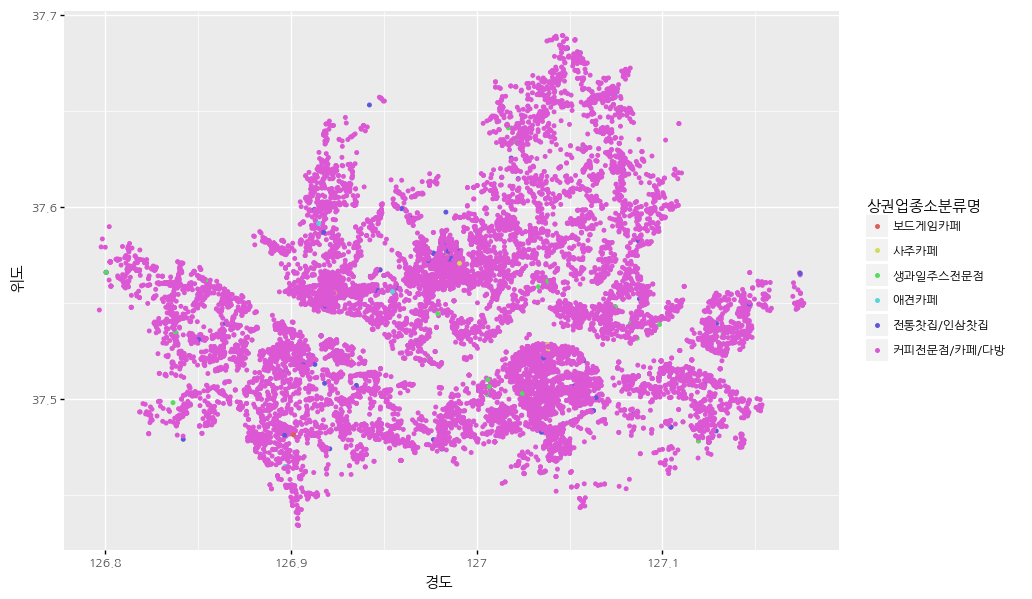

<ggplot: (103496573497)>

In [34]:
ggplot(shop_seoul_eat, aes(x='경도',y='위도', color='상권업종소분류명'))\
    + geom_point(size=1) \
    + theme(text=element_text(family='NanumGothic'), figure_size=(10, 7))

In [ ]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_seoul_eat, x='경도', y='위도', hue='상호명',s=20)

In [39]:
data = shop_seoul_eat[shop_seoul_eat['구군'] == '강남구']
edu_map = folium.Map(location=[data['위도'].mean(),data['경도'].mean()], zoom_start=12)

for i in data.index:
    edu_name = data.loc[i, '상호명'] + '-' + data.loc[i, '도로명주소']
    popup = folium.Popup(edu_name, max_width=200)
    folium.Marker(location=[data.loc[i, '위도'], data.loc[i,'경도']], popup=popup).add_to(edu_map)

edu_map.save('./output/edu_map.html')
edu_map